<a href="https://colab.research.google.com/github/mehrnazeraeisi/Spectral-Clustering/blob/main/Implement_Spectral_Clustering_3Steps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Why we should Spectral Clustering?

In [10]:
import numpy as np
from scipy import linalg
from sklearn.cluster import KMeans

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [12]:
n_samples=1500
random_state=170
X,y=make_blobs(n_samples=n_samples ,random_state=random_state
              )
# Anisotropicly distributed data

transformation=[[0.60834549  , -0.63667341] , [-0.40887718  , 0.85253229]]
X_aniso=np.dot(X ,transformation )

Text(0.5, 1.0, 'Unlabeled data')

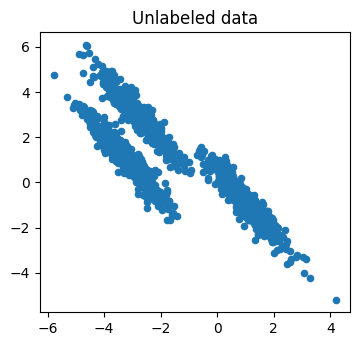

In [13]:
plt.figure(figsize=(4,8))
plt.subplot(211)
plt.scatter(X_aniso[: , 0] , X_aniso[: , 1]  , s=20)
plt.title("Unlabeled data")

Text(0.5, 1.0, 'Labels returned by KMeans')

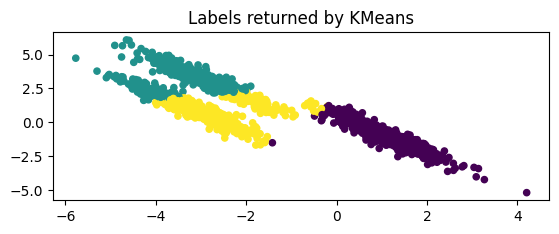

In [14]:
y_pred= KMeans(n_clusters=3 , random_state=random_state).fit_predict(X_aniso)

plt.subplot(212)
plt.scatter(X_aniso[: , 0] , X_aniso[: , 1], c=y_pred   ,s=20)
plt.title("Labels returned by KMeans")

# Step 1 : Form similarity graph


In [17]:
from scipy.spatial import distance

rbf_param=7.6

# Find M
K=np.exp(-rbf_param*distance.cdist(X_aniso , X_aniso  , metric='sqeuclidean'))

D=K.sum(axis=1)
D=np.sqrt(1/D)

M=np.multiply( D[ np.newaxis , : ] , np.multiply ( K , D[ : , np.newaxis] ))